In [1]:
import sensor_imputation_thesis.shared.load_data as load 
from data_insight import setup_duckdb
from duckdb import DuckDBPyConnection as DuckDB
import pandas as pd
from duckdb import DuckDBPyRelation as Relation
from pathlib import Path
import hashlib
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




In [4]:
import sys
sys.path.append('/home/ec2-user/SageMaker/sensor-imputation-thesis')


In [ ]:
#tags that combined columns for performance score and sfoc score 
tags = [
        "time",
        "fr_eng",
        "te_exh_cyl_out__0",
        "te_exh_cyl_out__1",
        "te_exh_cyl_out__2",
        "te_exh_cyl_out__3",
        "te_exh_cyl_out__4",
        "te_exh_cyl_out__5",
        "te_exh_cyl_out__6",
        "pd_air_ic__0",
        "pr_exh_turb_out__0",
        "pr_exh_turb_out__1",
        "pr_exh_turb_out__2",
        "pr_exh_turb_out__3",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "te_seawater",
        "te_air_comp_in_a__0",
        "te_air_comp_in_a__1",
        "te_air_comp_in_a__2",
        "te_air_comp_in_a__3",
        "fr_tc__0",
        "fr_tc__1",
        "fr_tc__2",
        "fr_tc__3",
        "pr_baro",
        "te_exh_turb_in__0",
        "te_exh_turb_in__1",
        "te_exh_turb_in__2",
        "te_exh_turb_in__3",
        "te_exh_turb_out__0",
        "te_exh_turb_out__1",
        "te_exh_turb_out__2",
        "te_exh_turb_out__3",
        "pr_exh_rec",
        "pr_air_scav",
        "pr_air_scav_ecs",
        "fr_eng_setpoint",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "pd_air_ic__0",
        "pd_air_ic__1",
        "pd_air_ic__2",
        "pd_air_ic__3",
        "pr_cyl_max__0",
        "pr_cyl_max__1",
        "pr_cyl_max__2",
        "pr_cyl_max__3",
        "pr_cyl_max__4",
        "pr_cyl_max__5",
        "pr_cyl_max__6",
        "pr_cyl_max__7",
        "pr_cyl_max__8",
        "pr_cyl_max__9",
        "pr_cyl_max__10",
        #tags needed for performance score calculation 
        "fr_eng_ecs",
        #"re_eng_load_ecs", #found, but renamed for calculating performance score 
       # "re_eng_load_pmi", #found, but renamed for calculating performance score 
        "se_mip__0",
        "se_mip__1",
        "se_mip__2",
        "se_mip__3",
        "se_mip__4",
        "se_mip__5",
        "se_mip__6",
        "se_mip__7",
        "se_mip__8",
        "se_mip__9",
        "se_mip__10",
        "se_mip__11",
        "pr_cyl_comp__0",
        "pr_cyl_comp__1",
        "pr_cyl_comp__2",
        "pr_cyl_comp__3",
        "pr_cyl_comp__4",
        "pr_cyl_comp__5",
        "pr_cyl_comp__6",
        "pr_cyl_comp__7",
        "pr_cyl_comp__8",
        "pr_cyl_comp__9",
        "pr_cyl_comp__10",
        "pr_cyl_comp__11",
        "te_cw_ic_in_common",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "in_stable", 
        "te_exh_turb_in_iso__0", 
        "te_exh_turb_in_iso__1",
        "te_exh_turb_in_iso__2",
        "te_exh_turb_in_iso__3",
        "fr_tc_iso__0", 
        "fr_tc_iso__1",
        "fr_tc_iso__2",
        "fr_tc_iso__3",
        "pr_cyl_max_mv_iso", 
        "pr_cyl_comp_mv_iso", 
        "pr_air_scav_iso", 
        # tags needed for sfoc score calculation 
        "te_air_scav_rec_iso", 
        "re_perf_idx_hrn_indicator", 
        "in_engine_running_mode",
        "te_exh_turb_in__0",
        "te_exh_turb_in__1",
        "te_exh_turb_in__2",
        "te_exh_turb_in__3",
        "bo_aux_blower_running",
        "re_eng_load"

        ]

In [2]:
#tags

tags=[
        "time",
        "fr_eng",
        "in_reference_mode",
        "fr_eng_ecs",
        "in_stable",
        "re_eng_load",
        "re_eng_load_estimate_ecs",  
        "re_eng_load", 
        "se_mip__0",
        "se_mip__1",
        "se_mip__2",
        "se_mip__3",
        "se_mip__4",
        "se_mip__5",
        "se_mip__6",
        "se_mip__7",
        "se_mip__8",
        "se_mip__9",
        "se_mip__10",
        "se_mip__11",
        "pr_cyl_comp__0",
        "pr_cyl_comp__1",
        "pr_cyl_comp__2",
        "pr_cyl_comp__3",
        "pr_cyl_comp__4",
        "pr_cyl_comp__5",
        "pr_cyl_comp__6",
        "pr_cyl_comp__7",
        "pr_cyl_comp__8",
        "pr_cyl_comp__9",
        "pr_cyl_comp__10",
        "pr_cyl_comp__11",
        "te_cw_ic_in_common",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "in_stable", 
        "te_exh_turb_in_iso__0", 
        "te_exh_turb_in_iso__1",
        "te_exh_turb_in_iso__2",
        "te_exh_turb_in_iso__3",
        "fr_tc_iso__0", 
        "fr_tc_iso__1",
        "fr_tc_iso__2",
        "fr_tc_iso__3",
        "pr_cyl_max_mv_iso",
        "pr_cyl_comp_mv_iso",
        "pr_air_scav_iso"

]

In [3]:
#For only training great vae, use this tag list 
tags = [
        "time",
        "fr_eng",
        "te_exh_cyl_out__0",
        "te_exh_cyl_out__1",
        "te_exh_cyl_out__2",
        "te_exh_cyl_out__3",
        "te_exh_cyl_out__4",
        "te_exh_cyl_out__5",
        "te_exh_cyl_out__6",
        "pd_air_ic__0",
        "pr_exh_turb_out__0",
        "pr_exh_turb_out__1",
        "pr_exh_turb_out__2",
        "pr_exh_turb_out__3",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "te_seawater",
        "te_air_comp_in_a__0",
        "te_air_comp_in_a__1",
        "te_air_comp_in_a__2",
        "te_air_comp_in_a__3",
        "fr_tc__0",
        "fr_tc__1",
        "fr_tc__2",
        "fr_tc__3",
        "pr_baro",
        "te_exh_turb_in__0",
        "te_exh_turb_in__1",
        "te_exh_turb_in__2",
        "te_exh_turb_in__3",
        "te_exh_turb_out__0",
        "te_exh_turb_out__1",
        "te_exh_turb_out__2",
        "te_exh_turb_out__3",
        "pr_exh_rec",
        "pr_air_scav",
        "pr_air_scav_ecs",
        "fr_eng_setpoint",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "pd_air_ic__0",
        "pd_air_ic__1",
        "pd_air_ic__2",
        "pd_air_ic__3",
        "pr_cyl_max__0",
        "pr_cyl_max__1",
        "pr_cyl_max__2",
        "pr_cyl_max__3",
        "pr_cyl_max__4",
        "pr_cyl_max__5",
        "pr_cyl_max__6",
        "pr_cyl_max__7",
        "pr_cyl_max__8",
        "pr_cyl_max__9",
        "pr_cyl_max__10",
        "pr_cyl_max__11"
        ]

While loading data, consider changing tags aligning with the columns required for quantifying user case score and sfoc 

import mlfow before running model 

In [4]:
pd.set_option('display.max_columns', None)

def load_engine_data(
    con: DuckDB, product_id: str, start: pd.Timestamp, stop: pd.Timestamp, tags: list[str]
) -> Relation:
    return con.sql(f"""
    SELECT {','.join(tags)}
    FROM timeseries
    WHERE
        time BETWEEN '{start}' AND '{stop}'
        AND pid = '{product_id}'
    """)

def get_tags_hash(tags):
    return hashlib.md5(','.join(tags).encode()).hexdigest()

start, stop = pd.Timestamp("2023-10-31"), pd.Timestamp("2024-12-31")

product_id = "237848bc2ed636c1ac85baea4755344c"

cache = Path(f'/tmp/data_{get_tags_hash(tags)}.parquet')
if cache.exists():
    df = pd.read_parquet(cache)
else:
    con = setup_duckdb()
    df = load_engine_data(con, product_id, start, stop, tags).df()
    df.to_parquet(cache)

print(df.head(10))

>>> con.sql("SHOW TABLES;")
┌────────────┐
│    name    │
│  varchar   │
├────────────┤
│ shipinfo   │
│ site_infos │
│ timeseries │
└────────────┘


>>> con.sql("DESCRIBE shipinfo;")
┌──────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────────────────┬─────────┬─────────┬─────────┬─────────┐
│                 column_name                  │                                  column_type                                  │  null   │   key   │ default │  extra  │
│                   varchar                    │                                    varchar                                    │ varchar │ varchar │ varchar │ varchar │
├──────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────┼─────────┼─────────┼─────────┼─────────┤
│ information_validity                         │ VARCHAR                                                                       │ YES     │ N

In [6]:
df1 = df.drop(columns=["fr_eng"])

In [9]:
#checking nan value counts in the dataframe
for col in df1.columns:
    print(f"Column {col} has {df[col].isna().sum()} NaN values")

Column time has 0 NaN values
Column te_exh_cyl_out__0 has 17310 NaN values
Column te_exh_cyl_out__1 has 17310 NaN values
Column te_exh_cyl_out__2 has 17310 NaN values
Column te_exh_cyl_out__3 has 17310 NaN values
Column te_exh_cyl_out__4 has 17310 NaN values
Column te_exh_cyl_out__5 has 17310 NaN values
Column te_exh_cyl_out__6 has 430897 NaN values
Column pd_air_ic__0 has 17311 NaN values
Column pr_exh_turb_out__0 has 430897 NaN values
Column pr_exh_turb_out__1 has 430897 NaN values
Column pr_exh_turb_out__2 has 430897 NaN values
Column pr_exh_turb_out__3 has 430897 NaN values
Column te_air_ic_out__0 has 17311 NaN values
Column te_air_ic_out__1 has 17311 NaN values
Column te_air_ic_out__2 has 430897 NaN values
Column te_air_ic_out__3 has 430897 NaN values
Column te_seawater has 430897 NaN values
Column te_air_comp_in_a__0 has 430897 NaN values
Column te_air_comp_in_a__1 has 430897 NaN values
Column te_air_comp_in_a__2 has 430897 NaN values
Column te_air_comp_in_a__3 has 430897 NaN val

In [8]:
df.to_parquet('9missingcolsdata.parquet')

# Calculate Performance Score Before Imputation

In [8]:
import os
import data_insight
import numpy as np
import pandas as pd
from uc90core.performance_index.perf_idx import PerformanceIndex

from sensor_imputation_thesis.shared.baba_wrapper import BabayagaWrapper

bbconfig = {
    "PROFILE": "production",
    "babayaga_system": "S3",
    "babayaga_config_name": "2-Stroke/Reference-Data/Configuration/ref_curve_config.yaml",
    "babayaga_config_location": "prod-analytics-hydra-api--hydra",
}
os.environ.update(bbconfig)


In [ ]:
pid = "237848bc2ed636c1ac85baea4755344c"
result = con.sql(f"SELECT engine_type FROM shipinfo WHERE productId = '{pid}'").df()
print("Engine Types:")
print(result)



Engine Types:
      engine_type
0  G70ME-C9.5-TII


In [13]:
#drop columns with in_reference_mode value equals 0
df2=df1[df1["in_reference_mode"].notna()]

In [14]:
len(df2)

309976

In [15]:
df3=df2.dropna(axis=1,how="all")

In [16]:
len(df3)

309976

In [53]:
df3.columns

Index(['time', 'in_reference_mode', 'fr_eng_ecs', 'in_stable', 're_eng_load',
       're_eng_load_estimate_ecs', 're_eng_load_1', 'se_mip__0', 'se_mip__1',
       'se_mip__2', 'se_mip__3', 'se_mip__4', 'se_mip__5', 'pr_cyl_comp__0',
       'pr_cyl_comp__1', 'pr_cyl_comp__2', 'pr_cyl_comp__3', 'pr_cyl_comp__4',
       'pr_cyl_comp__5', 'te_cw_ic_in_common', 'te_air_ic_out__0',
       'te_air_ic_out__1', 'in_stable_1', 'pr_cyl_max_mv_iso',
       'pr_cyl_comp_mv_iso', 'pr_air_scav_iso'],
      dtype='object')

In [9]:
# as gotten from the example, but I don't know how to get the uuid for other pid data 
engine_uuid = "72c9e0a1-17f5-4397-8e45-8433dea65883"
#define reference_mode (already filtered data based on having in_reference_model=1 criteria)
reference_mode=1
#engine_type
engine_type="G70ME-C9.5-TII"

In [10]:
babayaga_wrapper = BabayagaWrapper(engine_uuid=engine_uuid, reference_mode=reference_mode)

In [17]:
model = PerformanceIndex(
    fr_eng_mcr=babayaga_wrapper.fr_eng_smcr,
    **babayaga_wrapper.reference_curves,
    reference_mode=reference_mode,
    engine_type=engine_type,
)
result = model.evaluate(df3)
result

/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/uc90core/performance_index/perf_idx.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[opv_key] = np.nan
/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/uc90core/performance_index/perf_idx.py:236: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[opv_key] = np.nan
/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/uc90core/performance_index/perf

re_perf_idx_hrn_indicator  re_perf_idx_hrn  \
0                             NaN              NaN   
1                             NaN              NaN   
2                             NaN              NaN   
3                             NaN              NaN   
4                             NaN              NaN   
...                           ...              ...   
430892                        NaN              NaN   
430893                        NaN              NaN   
430894                        NaN              NaN   
430895                        NaN              NaN   
430896                        NaN              NaN   

        re_perf_idx_turbine_in_indicator  re_perf_idx_turbine_in  \
0                                    NaN                     NaN   
1                                    NaN                     NaN   
2                                    NaN                     NaN   
3                                    NaN                     NaN   
4                                    NaN                     NaN   
...                                  ...                     ...   
430892                               NaN                     NaN   
430893                               NaN                     NaN   
430894                               NaN                     NaN   
430895                               NaN                     NaN   
430896                               NaN                     NaN   

        re_perf_idx_tc_speed_indicator  re_perf_idx_tc_speed  \
0                                  NaN                   NaN   
1                                  NaN                   NaN   
2                                  NaN                   NaN   
3                                  NaN                   NaN   
4                                  NaN                   NaN   
...                                ...                   ...   
430892                             NaN                   NaN   
430893                             NaN                   NaN   
430894                             NaN                   NaN   
430895                             NaN                   NaN   
430896                             NaN                   NaN   

        pd_perf_idx_pscav_control_indicator  re_perf_idx_pscav_control  \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                       NaN                        NaN   
3                                       NaN                        NaN   
4                                       NaN                        NaN   
...                                     ...                        ...   
430892                                  NaN                        NaN   
430893                                  NaN                        NaN   
430894                                  NaN                        NaN   
430895                                  NaN                        NaN   
430896                                  NaN                        NaN   

        pd_perf_idx_pcomp_control_indicator  re_perf_idx_pcomp_control  \
0                                       NaN                        NaN   
1                                       NaN                        NaN   
2                                       NaN                        NaN   
3                                       NaN                        NaN   
4                                       NaN                        NaN   
...                                     ...                        ...   
430892                                  NaN                        NaN   
430893                                  NaN                        NaN   
430894                                  NaN                        NaN   
430895                                  NaN                        NaN   
430896                                  NaN                        NaN

In [ ]:
## Based on Engine Speed higher than 0 criteria
df1=df[df["fr_eng"]>0]

 Defining Imputation Method (100% outside of data distribution bonds)

In [22]:
import pandas as pd
import numpy as np

def impute_nan(data, scale=1.0, use_trend=True, epsilon=1e-9):
    """
    Replace NaN values with random values outside the min/max range of each column and guarantee 100% out of distribution
    while leveraging temporal context (neighboring values) to guide directionality

    Args:
       data: Input DataFrame (time-series, sorted by time)
       scale: Controls how far outside the min/max the imputed values are placed.
       use_trend: If true, impute direction (above/below) is based on neighboring trends.

    Returns:
      Data with NaNs replaced by values outside the original distribution
    """
    df = data.copy()

    for col in df.columns:
        if df[col].isna().sum() == 0:
            continue

        # min/max of the column
        min_val = df[col].min(skipna=True)
        max_val = df[col].max(skipna=True)

        # edge case: all values are identical (min == max)
        if min_val == max_val:
            min_val -= epsilon
            max_val += epsilon

        # Forward & backward fill to get neighboring values
        prev_vals = df[col].ffill()
        next_vals = df[col].bfill()

        # Iterate over NaN indices
        nan_indices = df.index[df[col].isna()]
        for idx in nan_indices:
            # Get neighboring values
            prev = prev_vals.loc[idx]
            next_ = next_vals.loc[idx]

            # Determine direction based on temporal context
            if use_trend:
                if pd.isna(prev) and pd.isna(next_):
                    # No temporal neighbors: random direction
                    direction = np.random.choice(['below', 'above'])
                elif pd.isna(prev):
                    # Only next value exists
                    direction = 'above' if next_ > df[col].median() else 'below'
                elif pd.isna(next_):
                    # Only previous value exists
                    direction = 'above' if prev > df[col].median() else 'below'
                else:
                    # Both neighbors exist: follow trend
                    direction = 'above' if next_ > prev else 'below'
            else:
                direction = np.random.choice(['below', 'above'])

            # Generate offset strictly >0
            offset = np.random.uniform(epsilon, scale)

            # Impute values
            if direction == 'below':
                imputed = min_val - offset
            else:
                imputed = max_val + offset

            df.loc[idx, col] = imputed

    return df


In [20]:
df4=df3[:10000]

VAE Model Training 

##### How to deal with nan values?
For target column ("the y"), assign single dummy value for the whole column (all rows);


For columns with partial nan values, assign one same dummy value (out of the min_max scope) for nan values;


For columns with all rows' nan values, assign one dummy (-1) for the column.


In [21]:

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import argparse
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

# Select numeric columns
numeric_df = df4.select_dtypes(include='number')

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Impute NaN values
data = impute_nan(scaled_df)

# Custom dataset for float data
class FloatDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Ensure integer-based indexing
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Create DataLoader
dataset = FloatDataset(data.values)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

# Split the dataset into training and testing sets based on time
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Configuration parameters (This part should be defined in the same cell when running in Jupyter)
class Config:
    batch_size = 128
    epochs = 10
    no_cuda = False
    no_mps = False
    seed = 1
    log_interval = 10

args = Config()
args.cuda = not args.no_cuda and torch.cuda.is_available()
use_mps = not args.no_mps and torch.backends.mps.is_available()

torch.manual_seed(args.seed)

if args.cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# VAE Model
class VAE(nn.Module):
    def __init__(self, input_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, input_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return self.fc4(h3)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(input_dim=scaled_data.shape[1]).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device).float()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"NaN or Inf detected in loss at batch {batch_idx}.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            data = data.to(device).float()  # Convert to FloatTensor
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(1, args.epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            sample = torch.randn(64, 20).to(device)
            sample = model.decode(sample).cpu()
            print(sample)  # Print the generated sample


/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/ec2-user/SageMaker/sensor-imputation-thesis/.venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


NaN or Inf detected in loss at batch 0.
NaN or Inf detected in loss at batch 1.
NaN or Inf detected in loss at batch 2.
NaN or Inf detected in loss at batch 3.
NaN or Inf detected in loss at batch 4.
NaN or Inf detected in loss at batch 5.
NaN or Inf detected in loss at batch 6.
NaN or Inf detected in loss at batch 7.
NaN or Inf detected in loss at batch 8.
NaN or Inf detected in loss at batch 9.
NaN or Inf detected in loss at batch 10.
NaN or Inf detected in loss at batch 11.
NaN or Inf detected in loss at batch 12.
NaN or Inf detected in loss at batch 13.
NaN or Inf detected in loss at batch 14.
NaN or Inf detected in loss at batch 15.
NaN or Inf detected in loss at batch 16.
NaN or Inf detected in loss at batch 17.
NaN or Inf detected in loss at batch 18.
NaN or Inf detected in loss at batch 19.
NaN or Inf detected in loss at batch 20.
NaN or Inf detected in loss at batch 21.
NaN or Inf detected in loss at batch 22.
NaN or Inf detected in loss at batch 23.
NaN or Inf detected in los

In [59]:
## Impute missing values using vae model on the same dataframe
# Function to impute NaN values using VAE model
def impute_with_vae(model, data, device, epsilon=1e-9):
    model.eval()
    imputed_data = data.copy()
    input_dim = data.shape[1]  # Ensure input dimension matches model's expectation

    with torch.no_grad():
        for i, row in imputed_data.iterrows():
            if row.isna().any():
                known_values = row.dropna()
                nan_columns = row.index[row.isna()]

                # Prepare the input data with known values
                input_data = np.zeros((1, input_dim))
                input_data[0, ~row.isna()] = known_values.values  # Fill known values

                input_data = torch.tensor(input_data, dtype=torch.float32).to(device)

                mu, logvar = model.encode(input_data)
                z = model.reparameterize(mu, logvar)
                recon_row = model.decode(z).cpu().numpy().flatten()

                for col in nan_columns:
                    imputed_data.at[i, col] = recon_row[data.columns.get_loc(col)]
    
    return imputed_data

imputed_df = impute_with_vae(model, scaled_df, device)
imputed_df_original_scale = pd.DataFrame(scaler.inverse_transform(imputed_df), columns=numeric_df.columns)
print("\nImputed DataFrame (original scale):")
print(imputed_df_original_scale)


Imputed DataFrame (original scale):
       in_reference_mode  fr_eng_ecs  in_stable  re_eng_load  \
0                    1.0    0.900000        1.0         0.44   
1                    1.0    0.901667        1.0         0.44   
2                    1.0    0.905000        1.0         0.44   
3                    1.0    0.898333        1.0         0.44   
4                    1.0    0.901667        1.0         0.44   
...                  ...         ...        ...          ...   
99995                1.0    1.105000        1.0         0.78   
99996                1.0    1.108333        1.0         0.78   
99997                1.0    1.106667        1.0         0.78   
99998                1.0    1.105000        1.0         0.78   
99999                1.0    1.108333        1.0         0.78   

       re_eng_load_estimate_ecs  re_eng_load_1  se_mip__0  se_mip__1  \
0                          0.43           0.44  1027000.0  1016000.0   
1                          0.43           0.44  10

Comparison Using Plt/statistics metrics between Original Data and Imputed Data 

In [1]:
import matplotlib.pyplot as plt

# Compare summary statistics
def compare_statistics(original, imputed, columns):
    for col in columns:
        orig_col = original[col].dropna()
        imputed_col = imputed[col]
        print(f"Statistics for {col}:")
        print(f"Original: mean = {orig_col.mean()}, std = {orig_col.std()}")
        print(f"Imputed: mean = {imputed_col.mean()}, std = {imputed_col.std()}")
        print()

# Apply comparison and plotting
compare_statistics(df4, imputed_df_original_scale, numeric_df.columns)
#plot_density(df3, imputed_df_original_scale, numeric_df.columns)


NameError: name 'df4' is not defined

/tmp/ipykernel_17012/222872696.py:24: RuntimeWarning: invalid value encountered in scalar divide
  'std_diff_percentage': ((imp_std - orig_std) / orig_std) * 100


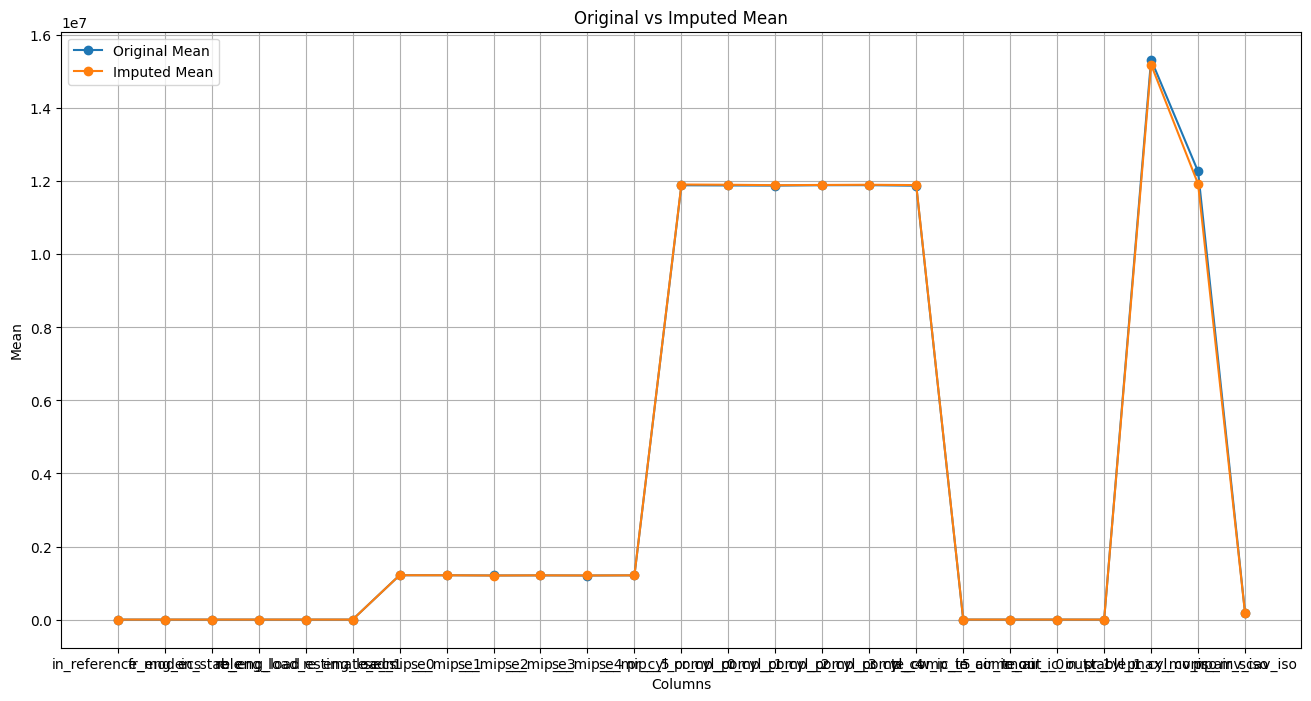

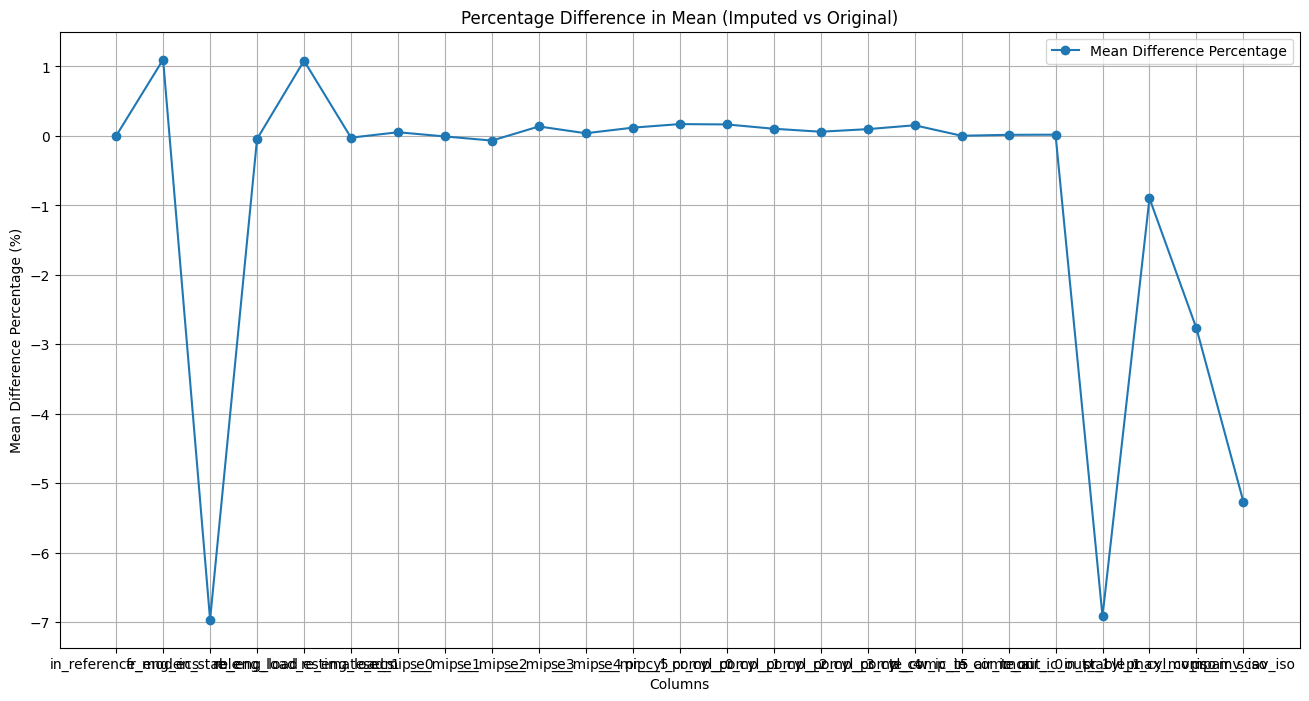

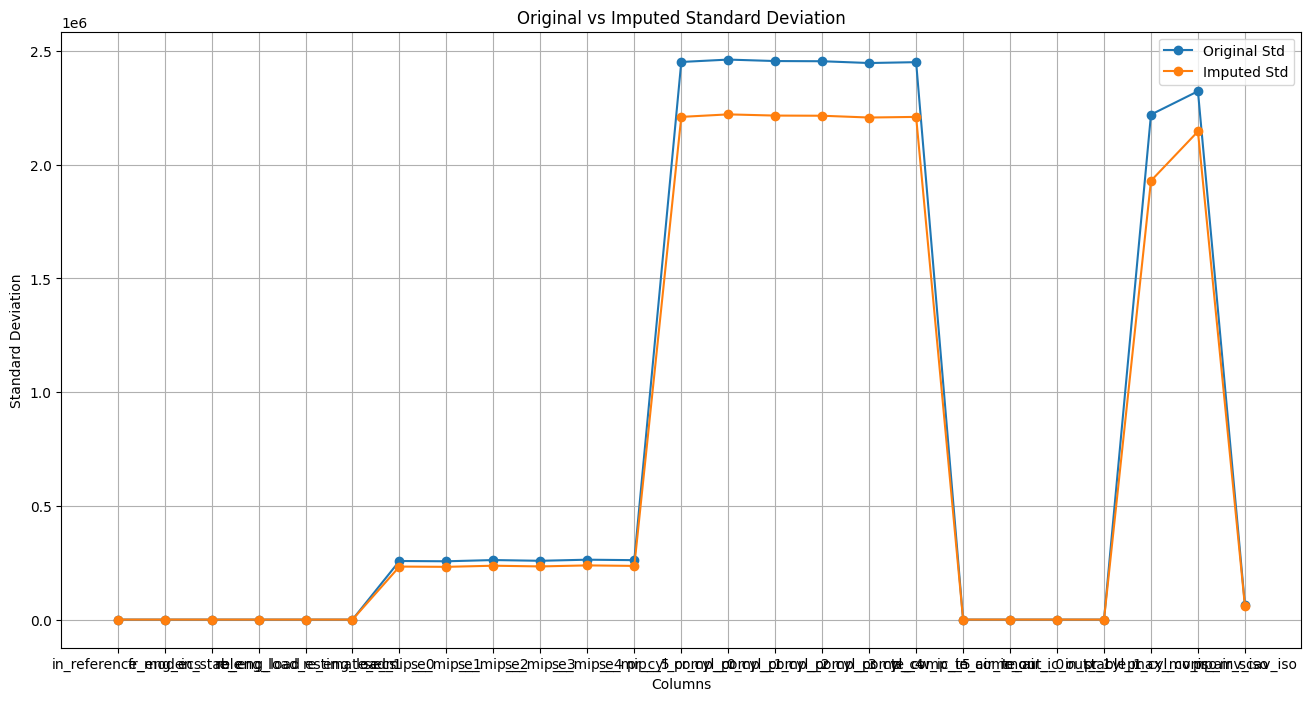

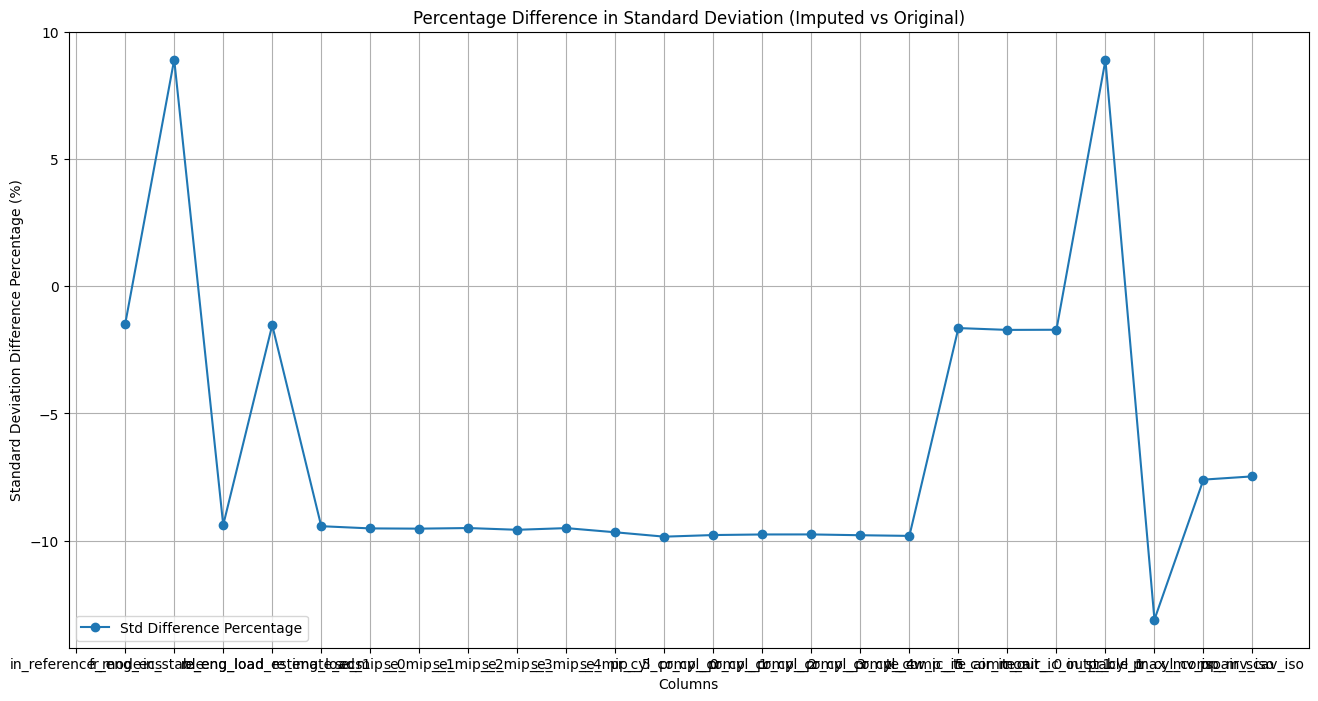

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Compare summary statistics and visualize percentages
def compare_statistics_line_plot(original, imputed, columns):
    stats = []

    for col in columns:
        orig_col = original[col].dropna()
        imputed_col = imputed[col]
        
        orig_mean = orig_col.mean()
        orig_std = orig_col.std()
        imp_mean = imputed_col.mean()
        imp_std = imputed_col.std()
        
        stats.append({
            'column': col,
            'original_mean': orig_mean,
            'imputed_mean': imp_mean,
            'mean_diff_percentage': ((imp_mean - orig_mean) / orig_mean) * 100,
            'original_std': orig_std,
            'imputed_std': imp_std,
            'std_diff_percentage': ((imp_std - orig_std) / orig_std) * 100
        })
        
    # Convert stats to DataFrame for easier plotting
    stats_df = pd.DataFrame(stats)
    
    # Plot mean differences
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['original_mean'], marker='o', label='Original Mean')
    plt.plot(stats_df['column'], stats_df['imputed_mean'], marker='o', label='Imputed Mean')
    plt.xlabel('Columns')
    plt.ylabel('Mean')
    plt.title('Original vs Imputed Mean')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot mean difference percentages
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['mean_diff_percentage'], marker='o', label='Mean Difference Percentage')
    plt.xlabel('Columns')
    plt.ylabel('Mean Difference Percentage (%)')
    plt.title('Percentage Difference in Mean (Imputed vs Original)')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot standard deviation differences
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['original_std'], marker='o', label='Original Std')
    plt.plot(stats_df['column'], stats_df['imputed_std'], marker='o', label='Imputed Std')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation')
    plt.title('Original vs Imputed Standard Deviation')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot standard deviation difference percentages
    plt.figure(figsize=(16, 8))
    plt.plot(stats_df['column'], stats_df['std_diff_percentage'], marker='o', label='Std Difference Percentage')
    plt.xlabel('Columns')
    plt.ylabel('Standard Deviation Difference Percentage (%)')
    plt.title('Percentage Difference in Standard Deviation (Imputed vs Original)')
    plt.legend()
    plt.grid(True)
    plt.show()


compare_statistics_line_plot(df4, imputed_df_original_scale, numeric_df.columns)


/tmp/ipykernel_17012/2873923652.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(orig_col, fill=True, label='Original', ax=axes[i])
/tmp/ipykernel_17012/2873923652.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(imputed_col, fill=True, label='Imputed', ax=axes[i])
/tmp/ipykernel_17012/2873923652.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()


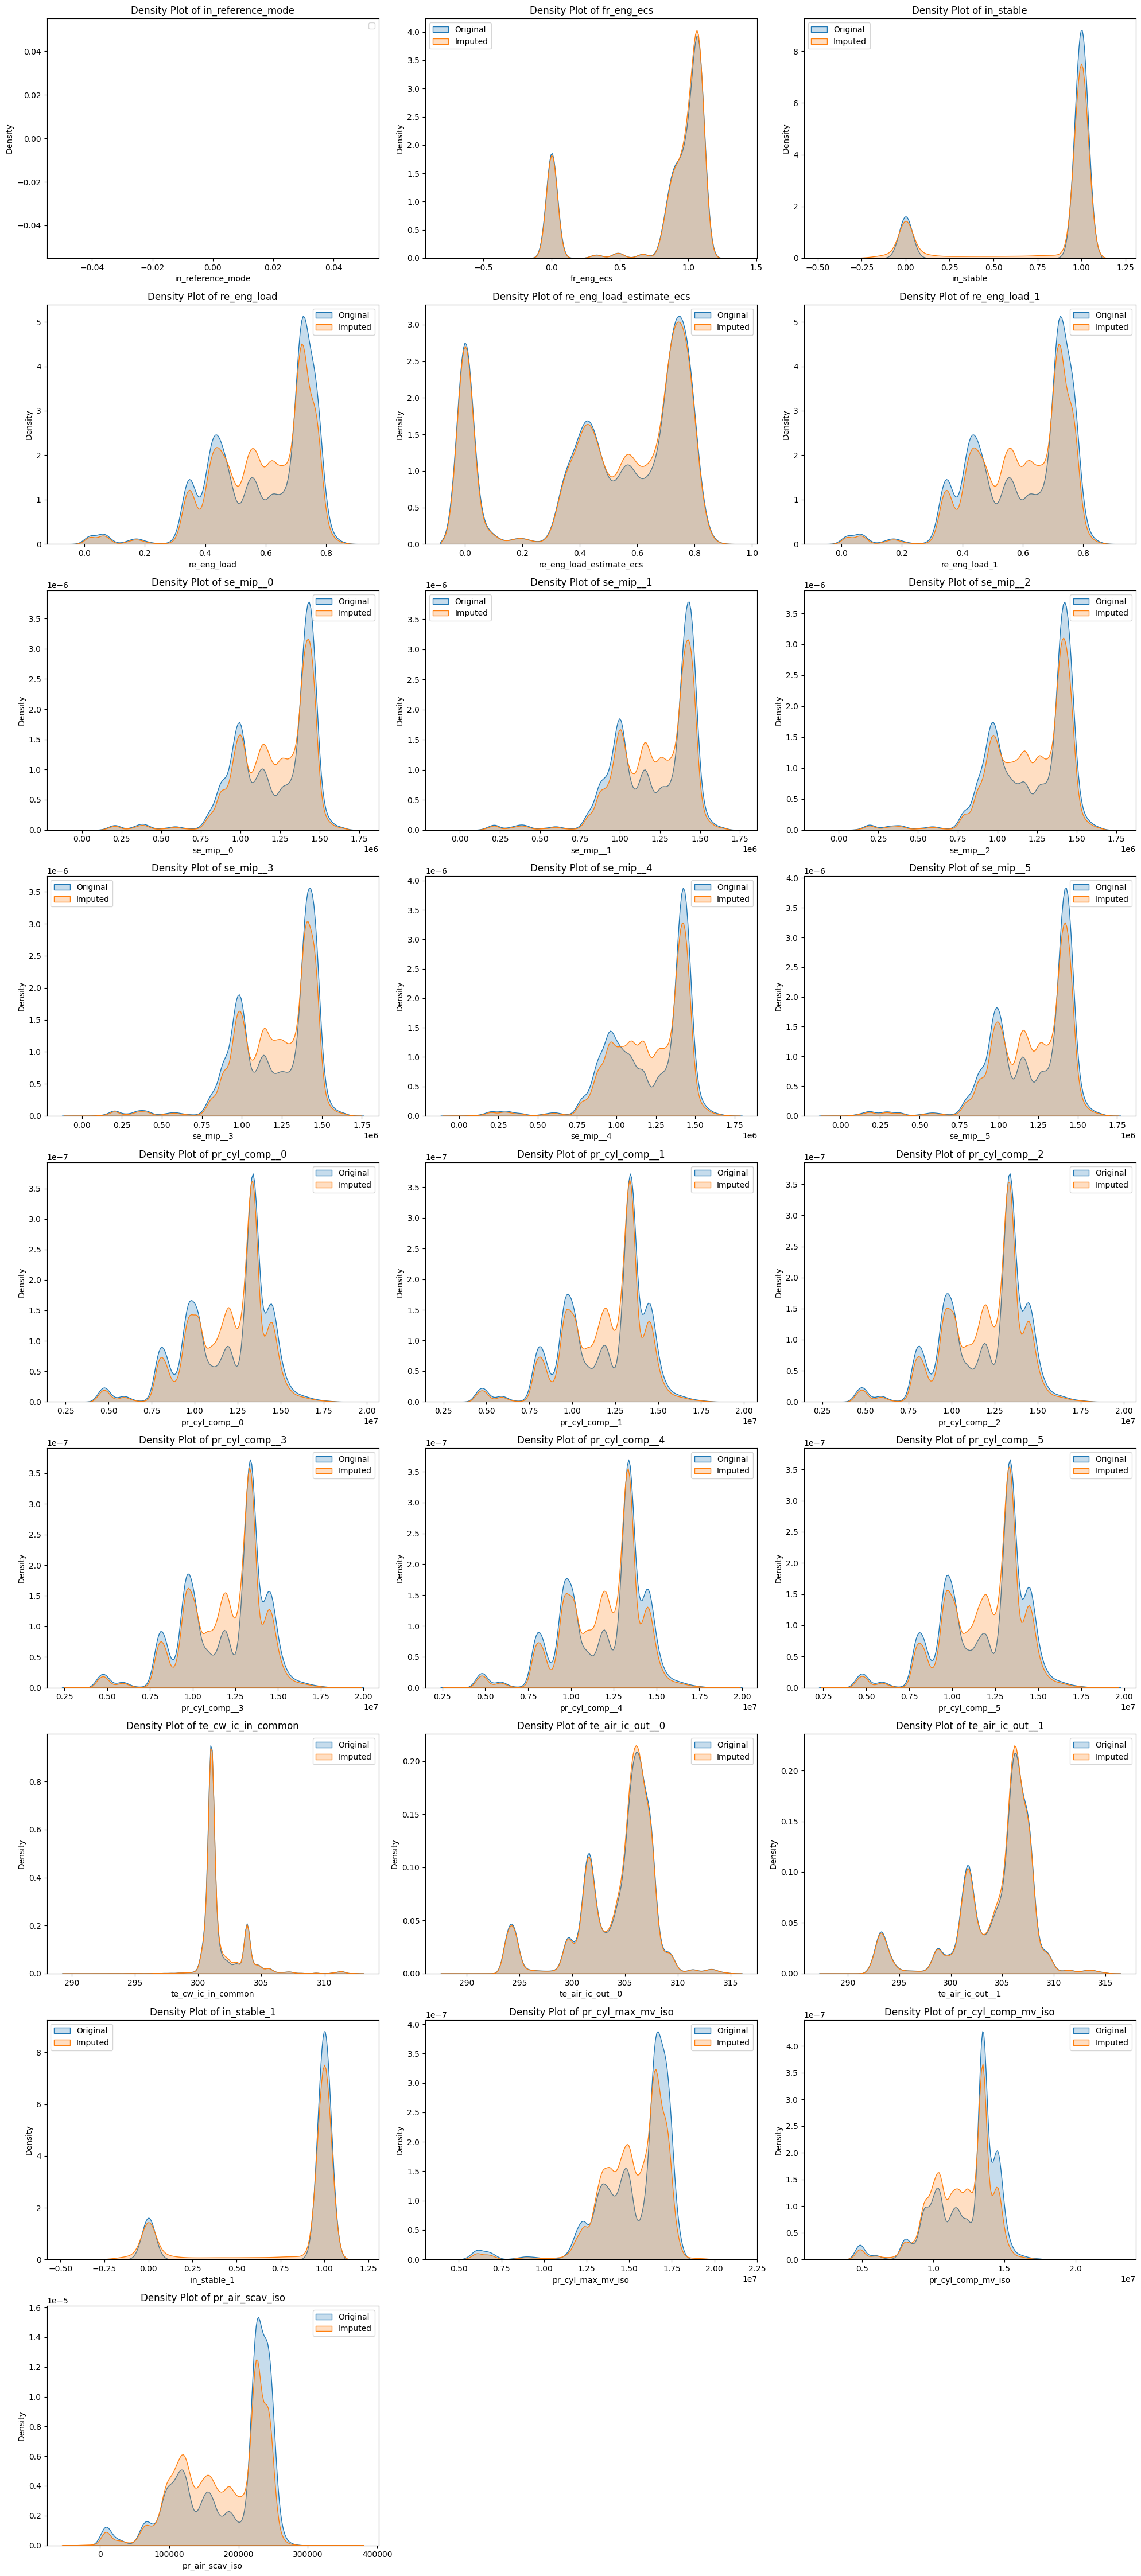

In [67]:
# Density Plots
import seaborn as sns

def plot_density(original, imputed, columns, plots_per_row=3):
    num_columns = len(columns)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))  # Adjust figure size
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, col in enumerate(columns):
        orig_col = original[col].dropna()
        imputed_col = imputed[col]

        sns.kdeplot(orig_col, fill=True, label='Original', ax=axes[i])
        sns.kdeplot(imputed_col, fill=True, label='Imputed', ax=axes[i])
        axes[i].set_title(f'Density Plot of {col}')
        axes[i].legend()

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_density(df4, imputed_df_original_scale, numeric_df.columns)

In [69]:
imputed_df_original_scale.columns

Index(['in_reference_mode', 'fr_eng_ecs', 'in_stable', 're_eng_load',
       're_eng_load_estimate_ecs', 're_eng_load_1', 'se_mip__0', 'se_mip__1',
       'se_mip__2', 'se_mip__3', 'se_mip__4', 'se_mip__5', 'pr_cyl_comp__0',
       'pr_cyl_comp__1', 'pr_cyl_comp__2', 'pr_cyl_comp__3', 'pr_cyl_comp__4',
       'pr_cyl_comp__5', 'te_cw_ic_in_common', 'te_air_ic_out__0',
       'te_air_ic_out__1', 'in_stable_1', 'pr_cyl_max_mv_iso',
       'pr_cyl_comp_mv_iso', 'pr_air_scav_iso'],
      dtype='object')

VAE with most missing columns 

In [4]:
import sensor_imputation_thesis.shared.load_data as load 
from data_insight import setup_duckdb
from duckdb import DuckDBPyConnection as DuckDB
import pandas as pd
from duckdb import DuckDBPyRelation as Relation
from pathlib import Path
import hashlib

In [5]:
import pandas as pd 
pd.set_option('display.max_columns', None)

def load_engine_data(
    con: DuckDB, product_id: str, start: pd.Timestamp, stop: pd.Timestamp, tags: list[str]
) -> Relation:
    return con.sql(f"""
    SELECT {','.join(tags)}
    FROM timeseries
    WHERE
        time BETWEEN '{start}' AND '{stop}'
        AND pid = '{product_id}'
    """)

def get_tags_hash(tags):
    return hashlib.md5(','.join(tags).encode()).hexdigest()

start, stop = pd.Timestamp("2023-10-01"), pd.Timestamp("2024-10-01")

tags = [
        "time",
        "fr_eng",
        "te_exh_cyl_out__0",
        "te_exh_cyl_out__1",
        "te_exh_cyl_out__2",
        "te_exh_cyl_out__3",
        "te_exh_cyl_out__4",
        "te_exh_cyl_out__5",
        "te_exh_cyl_out__6",
        "pd_air_ic__0",
        "pr_exh_turb_out__0",
        "pr_exh_turb_out__1",
        "pr_exh_turb_out__2",
        "pr_exh_turb_out__3",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "te_seawater",
        "te_air_comp_in_a__0",
        "te_air_comp_in_a__1",
        "te_air_comp_in_a__2",
        "te_air_comp_in_a__3",
        "fr_tc__0",
        "fr_tc__1",
        "fr_tc__2",
        "fr_tc__3",
        "pr_baro",
        "te_exh_turb_in__0",
        "te_exh_turb_in__1",
        "te_exh_turb_in__2",
        "te_exh_turb_in__3",
        "te_exh_turb_out__0",
        "te_exh_turb_out__1",
        "te_exh_turb_out__2",
        "te_exh_turb_out__3",
        "pr_exh_rec",
        "pr_air_scav",
        "pr_air_scav_ecs",
        "fr_eng_setpoint",
        "te_air_ic_out__0",
        "te_air_ic_out__1",
        "te_air_ic_out__2",
        "te_air_ic_out__3",
        "pd_air_ic__0",
        "pd_air_ic__1",
        "pd_air_ic__2",
        "pd_air_ic__3",
        "pr_cyl_max__0",
        "pr_cyl_max__1",
        "pr_cyl_max__2",
        "pr_cyl_max__3",
        "pr_cyl_max__4",
        "pr_cyl_max__5",
        "pr_cyl_max__6",
        "pr_cyl_max__7",
        "pr_cyl_max__8",
        "pr_cyl_max__9",
        "pr_cyl_max__10",
        "pr_cyl_max__11"
        ]
product_id = "89ccb7a888d53f8792f0580801cede9a"

cache = Path(f'/tmp/data_{get_tags_hash(tags)}.parquet')
if cache.exists():
    df = pd.read_parquet(cache)
else:
    con = setup_duckdb()
    df = load_engine_data(con, product_id, start, stop, tags).df()
    df.to_parquet(cache)

print(df.head(10))

                 time  fr_eng  te_exh_cyl_out__0  te_exh_cyl_out__1  \
0 2023-10-01 00:00:00     0.0             400.15             402.15   
1 2023-10-01 00:01:00     0.0             399.15             402.15   
2 2023-10-01 00:02:00     0.0             399.15             401.15   
3 2023-10-01 00:03:00     0.0             399.15             401.15   
4 2023-10-01 00:04:00     0.0             399.15             401.15   
5 2023-10-01 00:05:00     0.0             399.15             401.15   
6 2023-10-01 00:06:00     0.0             399.15             401.15   
7 2023-10-01 00:07:00     0.0             399.15             400.15   
8 2023-10-01 00:08:00     0.0             399.15             400.15   
9 2023-10-01 00:09:00     0.0             399.15             400.15   

   te_exh_cyl_out__2  te_exh_cyl_out__3  te_exh_cyl_out__4  te_exh_cyl_out__5  \
0             397.15             399.15             398.15             401.15   
1             397.15             398.15             398.

In [6]:
# Based on Engine Speed higher than 0 criteria
#drop columns with all nan values 
df1=df.dropna(axis=1,how="all")
df2=df1[df1["fr_eng"]>0]


In [9]:
df2.columns

Index(['time', 'fr_eng', 'te_exh_cyl_out__0', 'te_exh_cyl_out__1',
       'te_exh_cyl_out__2', 'te_exh_cyl_out__3', 'te_exh_cyl_out__4',
       'te_exh_cyl_out__5', 'te_exh_cyl_out__6', 'pd_air_ic__0',
       'te_air_ic_out__0', 'te_air_ic_out__1', 'te_air_ic_out__2',
       'te_seawater', 'pr_baro', 'pr_exh_rec', 'pr_air_scav',
       'pr_air_scav_ecs', 'fr_eng_setpoint', 'te_air_ic_out__0_1',
       'te_air_ic_out__1_1', 'te_air_ic_out__2_1', 'pd_air_ic__0_1',
       'pd_air_ic__1', 'pd_air_ic__2', 'pr_cyl_max__0', 'pr_cyl_max__1',
       'pr_cyl_max__2', 'pr_cyl_max__3', 'pr_cyl_max__4', 'pr_cyl_max__5',
       'pr_cyl_max__6', 'pr_cyl_max__7', 'pr_cyl_max__8', 'pr_cyl_max__9',
       'pr_cyl_max__10'],
      dtype='object')

In [16]:
len(df2)

301362

In [17]:
df3=df2[:100000]

In [18]:

import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import argparse
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms

# Select numeric columns
numeric_df = df3.select_dtypes(include='number')

# Standardize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Convert scaled data back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Impute NaN values
data = impute_nan(scaled_df)

# Custom dataset for float data
class FloatDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Ensure integer-based indexing
        return torch.tensor(self.data[idx], dtype=torch.float32)

# Create DataLoader
dataset = FloatDataset(data.values)
dataloader = DataLoader(dataset, batch_size=2, shuffle=False)

# Split the dataset into training and testing sets based on time
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Configuration parameters (This part should be defined in the same cell when running in Jupyter)
class Config:
    batch_size = 128
    epochs = 10
    no_cuda = False
    no_mps = False
    seed = 1
    log_interval = 10

args = Config()
args.cuda = not args.no_cuda and torch.cuda.is_available()
use_mps = not args.no_mps and torch.backends.mps.is_available()

torch.manual_seed(args.seed)

if args.cuda:
    device = torch.device("cuda")
elif use_mps:
    device = torch.device("mps")
else:
    device = torch.device("cpu")

# VAE Model
class VAE(nn.Module):
    def __init__(self, input_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 400)
        self.fc21 = nn.Linear(400, 20)
        self.fc22 = nn.Linear(400, 20)
        self.fc3 = nn.Linear(20, 400)
        self.fc4 = nn.Linear(400, input_dim)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return self.fc4(h3)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

model = VAE(input_dim=scaled_data.shape[1]).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):
    MSE = F.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return MSE + KLD

def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, data in enumerate(train_loader):
        data = data.to(device).float()
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        if torch.isnan(loss) or torch.isinf(loss):
            print(f"NaN or Inf detected in loss at batch {batch_idx}.")
            continue
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        train_loss += loss.item()
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader),
                loss.item() / len(data)))
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))

def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            data = data.to(device).float()  # Convert to FloatTensor
            recon_batch, mu, logvar = model(data)
            test_loss += loss_function(recon_batch, data, mu, logvar).item()
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))

if __name__ == "__main__":
    for epoch in range(1, args.epochs + 1):
        train(epoch)
        test(epoch)
        with torch.no_grad():
            sample = torch.randn(64, 20).to(device)
            sample = model.decode(sample).cpu()
            print(sample)  # Print the generated sample


Train Epoch: 1 [0/80000 (0%)]	Loss: 24.677794
Train Epoch: 1 [20/80000 (0%)]	Loss: 291.618896
Train Epoch: 1 [40/80000 (0%)]	Loss: 541.018799
Train Epoch: 1 [60/80000 (0%)]	Loss: 6.392013
Train Epoch: 1 [80/80000 (0%)]	Loss: 259.491852
Train Epoch: 1 [100/80000 (0%)]	Loss: 231.326172
Train Epoch: 1 [120/80000 (0%)]	Loss: 30.881067
Train Epoch: 1 [140/80000 (0%)]	Loss: 33.668800
Train Epoch: 1 [160/80000 (0%)]	Loss: 35.113842
Train Epoch: 1 [180/80000 (0%)]	Loss: 303.587738
Train Epoch: 1 [200/80000 (0%)]	Loss: 156.271561
Train Epoch: 1 [220/80000 (0%)]	Loss: 137.656647
Train Epoch: 1 [240/80000 (0%)]	Loss: 199.806000
Train Epoch: 1 [260/80000 (0%)]	Loss: 169.191071
Train Epoch: 1 [280/80000 (0%)]	Loss: 131.600296
Train Epoch: 1 [300/80000 (0%)]	Loss: 74.109818
Train Epoch: 1 [320/80000 (0%)]	Loss: 123.683479
Train Epoch: 1 [340/80000 (0%)]	Loss: 69.004257
Train Epoch: 1 [360/80000 (0%)]	Loss: 64.805573
Train Epoch: 1 [380/80000 (0%)]	Loss: 28.416500
Train Epoch: 1 [400/80000 (0%)]	Loss

In [19]:
## Impute missing values using vae model on the same dataframe
# Function to impute NaN values using VAE model
def impute_with_vae(model, data, device, epsilon=1e-9):
    model.eval()
    imputed_data = data.copy()
    input_dim = data.shape[1]  # Ensure input dimension matches model's expectation

    with torch.no_grad():
        for i, row in imputed_data.iterrows():
            if row.isna().any():
                known_values = row.dropna()
                nan_columns = row.index[row.isna()]

                # Prepare the input data with known values
                input_data = np.zeros((1, input_dim))
                input_data[0, ~row.isna()] = known_values.values  # Fill known values

                input_data = torch.tensor(input_data, dtype=torch.float32).to(device)

                mu, logvar = model.encode(input_data)
                z = model.reparameterize(mu, logvar)
                recon_row = model.decode(z).cpu().numpy().flatten()

                for col in nan_columns:
                    imputed_data.at[i, col] = recon_row[data.columns.get_loc(col)]
    
    return imputed_data

imputed_df = impute_with_vae(model, scaled_df, device)
imputed_df_original_scale = pd.DataFrame(scaler.inverse_transform(imputed_df), columns=numeric_df.columns)
print("\nImputed DataFrame (original scale):")
print(imputed_df_original_scale)


Imputed DataFrame (original scale):
         fr_eng  te_exh_cyl_out__0  te_exh_cyl_out__1  te_exh_cyl_out__2  \
0      0.197315             319.15             322.15             321.15   
1      0.453224             321.15             323.15             322.15   
2      0.445776             329.15             331.15             330.15   
3      0.447881             339.15             343.15             342.15   
4      0.448938             348.15             352.15             351.15   
...         ...                ...                ...                ...   
99995  0.948659             556.15             554.15             566.15   
99996  0.950825             556.15             553.15             565.15   
99997  0.951677             555.15             553.15             565.15   
99998  0.952139             555.15             553.15             565.15   
99999  0.952132             556.15             553.15             565.15   

       te_exh_cyl_out__3  te_exh_cyl_out__4  te_ex

In [23]:
len(df3)

100000

In [24]:
len(imputed_df_original_scale)

100000

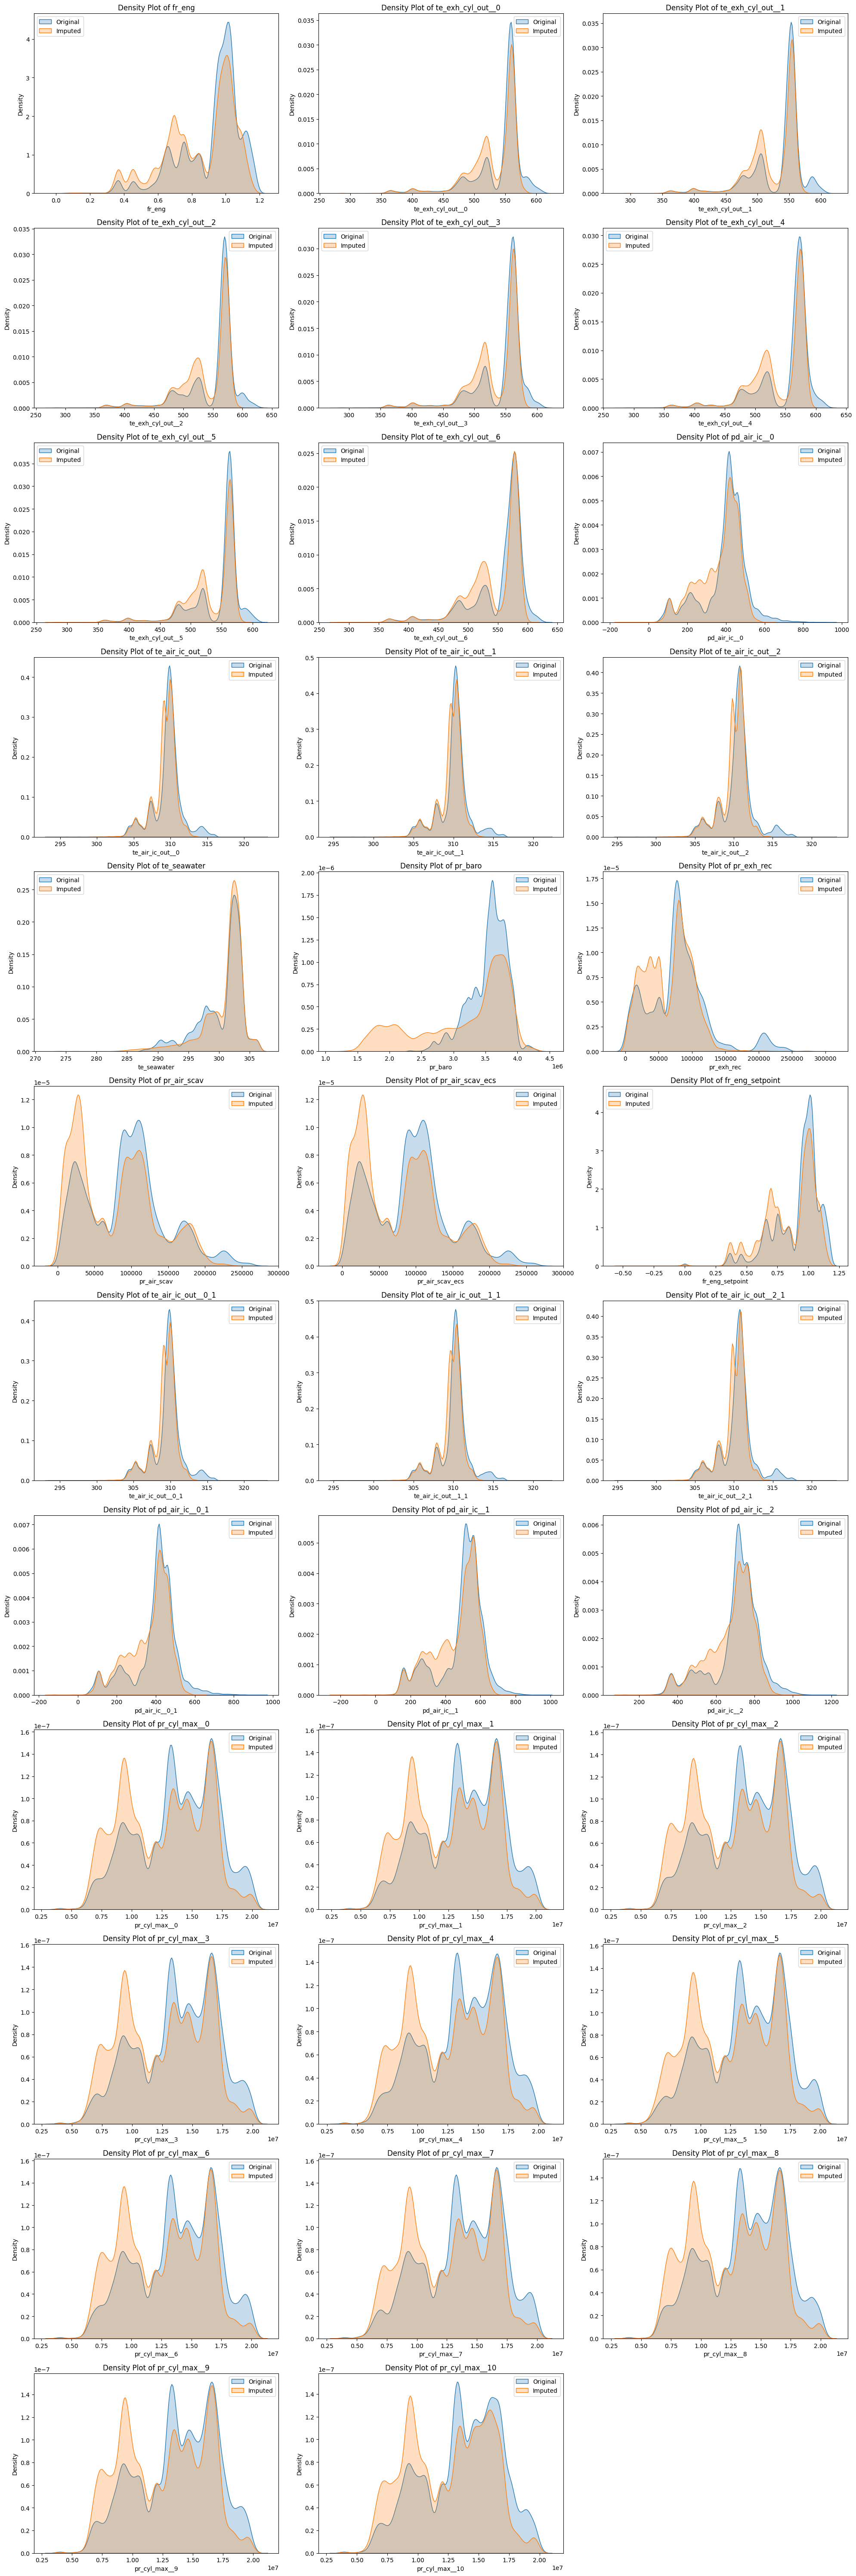

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Density Plots with filtering out rows that 100% align with original values
import seaborn as sns
import matplotlib.pyplot as plt

# Density Plots with filtering out rows that 100% align with original values
def plot_density(original, imputed, columns, plots_per_row=3):
    num_columns = len(columns)
    num_rows = (num_columns + plots_per_row - 1) // plots_per_row  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(20, 5 * num_rows))  # Adjust figure size
    axes = axes.flatten()  # Flatten the axes array for easy indexing

    for i, col in enumerate(columns):
        orig_col = original[col].dropna()
        imputed_col = imputed[col]

        # Align indexes
        orig_col, imputed_col = orig_col.align(imputed_col, join='inner')

        # Filter out rows where the original and imputed values are the same
        filter_mask = orig_col != imputed_col
        orig_col_filtered = orig_col[filter_mask]
        imputed_col_filtered = imputed_col[filter_mask]

        sns.kdeplot(orig_col_filtered, fill=True, label='Original', ax=axes[i])
        sns.kdeplot(imputed_col_filtered, fill=True, label='Imputed', ax=axes[i])
        axes[i].set_title(f'Density Plot of {col}')
        axes[i].legend()

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


# Example usage
plot_density(df3, imputed_df_original_scale, numeric_df.columns)


### Performance Score Quantifying

SFOC Calculation 